In [23]:
%matplotlib inline

In [24]:
import numpy as np
from scipy import interpolate, ndimage
import matplotlib.pyplot as plt
import matplotlib.mlab as lab

# Load Image

In [25]:
t = 0
frames=np.load('dataFiles/4braccia.npy')
im=frames[t].copy()
#plt.figure()
#plt.imshow(im)
#plt.gray()
im=im.astype(float)
plt.gray()

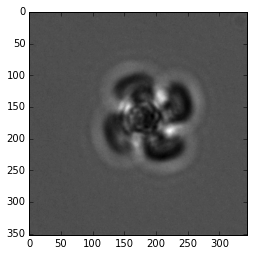

In [26]:
plt.imshow(im)

# Stretching Histogram

In [27]:
h,w = np.shape(im)
hstretch_low=0.05
hstretch_high=0.3


#stretch the histogram:
hcount,bine=np.histogram(im.flatten(),200)
binc=bine[:-1]+np.diff(bine)/2
hcount=hcount.astype(float)/(h*w)

#determine the low intensity treshhold:
mask=(np.cumsum(hcount)<hstretch_low)
ti=lab.find(mask)[-1]
tresh_low=binc[ti]
#determine the high intensity treshhold:
mask=(np.cumsum(hcount)<hstretch_high)
ti=lab.find(mask)[-1]
tresh_high=binc[ti]

im-=tresh_low
im[im<0]=0
im*=1/(tresh_high-tresh_low)
im[im>1]=1

In [28]:
print h
print w
print np.shape(im)

352
344
(352, 344)


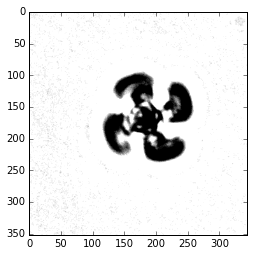

In [29]:
plt.imshow(im)

# Create Ring

In [30]:
r1=50
r2=65
m=im>0.5
x,y = ndimage.measurements.center_of_mass(~m)

xvec=np.arange(w)
yvec=np.arange(h)

X,Y=np.meshgrid(xvec-y,yvec-x)

rmat=np.sqrt(X**2+Y**2)

mask1=rmat>r1
mask2=rmat<r2
mask=np.logical_and(mask1,mask2)

im2=im=frames[t].copy().astype(float)

im2[~mask]=0

In [37]:
print h
print w
print np.shape(m)
print y,x
print np.shape(X),np.shape(Y)
print np.shape(rmat)
print np.shape(mask1),np.shape(mask2)
print np.shape(mask)
print np.shape(im2)

352
344
(352, 344)
188.889474262 167.887169356
(352, 344) (352, 344)
(352, 344)
(352, 344) (352, 344)
(352, 344)
(352, 344)


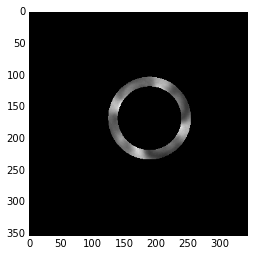

In [44]:
plt.imshow(im2)

In [45]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

# Interpolation

In [46]:
pval=im2[mask]
xc=X[mask]
yc=Y[mask]

theta=np.arctan2(yc,xc)
theta=theta*180/np.pi
r=rmat[mask]

tr = np.linspace(r1, r2, 20)
NP=round(2*np.pi*r2)
ttheta = np.linspace(-180,180,100)
RI,TI = np.meshgrid(tr,ttheta)

gridRot=interpolate.griddata((r,theta),pval,(RI,TI), fill_value=0)
I = np.sum(gridRot,axis=1)

In [47]:
print np.shape(r)
print np.shape(theta)
print np.shape(pval)
print np.shape(RI)
print np.shape(TI)

(5415,)
(5415,)
(5415,)
(100, 20)
(100, 20)


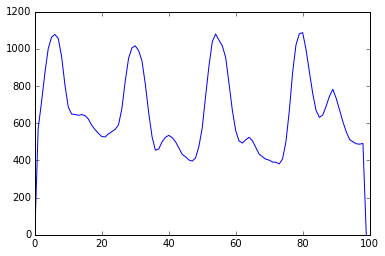

In [43]:
plt.plot(I)